This notebook generates figures displaying the results for the inverted file index solution

In [2]:
import pickle
import collections
import matplotlib.pyplot as plt
import numpy as np
import itertools
import statistics
import matplotlib.cm as cm
import time
import os
from time import perf_counter_ns

In [3]:
# read in embeddings and cluster label info
with open('embedding64.pickle', 'rb') as fp:
    embedding64 = pickle.load(fp)
with open('label_info.pickle', 'rb') as fp:
    label_info = pickle.load(fp)

print(embedding64.keys())
print(label_info.keys())

dict_keys(['embed_all', 'embed_raw', 'embed_l2_norm', 'restore_order', 'embed_correct_coverage_fh', 'embed_l2_norm_correct_coverage_fh'])
dict_keys(['batch id', 'age', 'total_cg', 'average_cg_rate', 'total_ch', 'average_ch_rate', 'hic_counts', 'cell_name_higashi', 'major', 'minor', 'cluster label', 'cluster label minor'])


In [4]:
# create helpful dicts for the cluster labels
# also look at n counts for the clusters
major_labels = list(set(label_info['cluster label']))
minor_labels = list(set(label_info['cluster label minor']))

major = dict(zip(major_labels,[[] for item in major_labels]))
minor = dict(zip(minor_labels,[[] for item in minor_labels]))

true_major = label_info['cluster label']
true_minor = label_info['cluster label minor']

for j in range(len(label_info['cluster label'])):
    maj = label_info['cluster label'][j]
    min = label_info['cluster label minor'][j]

    if maj in major.keys():
        major[maj].append(j)
    if min in minor.keys():
        minor[min].append(j)

print("MAJOR CLUSTERS")
for key in major.keys():
    s = "    " + key + ": " + str(len(major[key]))
    print(s)
    
print("MINOR CLUSTERS")
for key in minor.keys():
    s = "    " + key + ": " + str(len(minor[key]))
    print(s)

MAJOR CLUSTERS
    Sst: 217
    Ndnf: 144
    Vip: 171
    L5: 180
    OPC: 203
    L4: 131
    ODC: 1245
    L6: 86
    MP: 100
    MG: 422
    L2/3: 551
    Pvalb: 134
    Endo: 205
    Astro: 449
MINOR CLUSTERS
    Ndnf-2: 63
    Sst-3: 60
    MP-1: 100
    Ndnf-1: 59
    Pvalb-2: 21
    L2/3-4: 150
    ODC-1: 810
    Vip-2: 126
    L5-2: 74
    Ndnf-3: 22
    L6-2: 19
    Vip-1: 45
    Pvalb-1: 113
    Endo-1: 51
    L2/3-3: 127
    L5-3: 58
    L2/3-1: 137
    L4-1: 131
    Endo-3: 85
    Sst-1: 50
    L2/3-2: 137
    OPC-1: 203
    Sst-2: 107
    Endo-2: 69
    MG-1: 422
    L6-1: 67
    ODC-2: 435
    L5-1: 48
    Astro-1: 449


In [5]:
#### IVF FLAT INDEX
# read in the results
with open('IVFFLAT/ExperimentA.npy', 'rb') as f:
    recall_min_A = np.load(f)
    recall_maj_A = np.load(f)
    speed_min_A = np.load(f)
    speed_maj_A = np.load(f)
    memory_A = np.load(f)
with open('IVFFLAT/ExperimentB.npy', 'rb') as f:
    recall_min_B = np.load(f)
    recall_maj_B = np.load(f)
    speed_min_B = np.load(f)
    speed_maj_B = np.load(f)
    memory_B = np.load(f)
with open('IVFFLAT/ExperimentC.npy', 'rb') as f:
    recall_min_C = np.load(f)
    recall_maj_C = np.load(f)
    speed_min_C = np.load(f)
    speed_maj_C = np.load(f)
    memory_C = np.load(f)
with open('IVFFLAT/ExperimentD.npy', 'rb') as f:
    recall_min_D = np.load(f)
    recall_maj_D = np.load(f)
    speed_min_D = np.load(f)
    speed_maj_D = np.load(f)
    memory_D = np.load(f)
with open('IVFFLAT/ExperimentE.npy', 'rb') as f:
    recall_min_E = np.load(f)
    recall_maj_E = np.load(f)
    speed_min_E = np.load(f)
    speed_maj_E = np.load(f)
    memory_E = np.load(f)

In [6]:
# compare memory and speed for the selected indexes
mem = [1084973, 
       np.mean(memory_A), 
       np.mean(memory_B), 
       np.mean(memory_C), 
       np.mean(memory_D), 
       np.mean(memory_E)]

speed_minor = [8936997.569608307, 
               np.mean(speed_min_A,axis=1)[2], 
               np.mean(speed_min_B,axis=1)[8], 
               np.mean(speed_min_C,axis=1)[13], 
               np.mean(speed_min_D,axis=1)[19], 
               np.mean(speed_min_E,axis=1)[23]]

speed_major = [11708813.992449269, 
               np.mean(speed_maj_A,axis=1)[2], 
               np.mean(speed_maj_B,axis=1)[8], 
               np.mean(speed_maj_C,axis=1)[13], 
               np.mean(speed_maj_D,axis=1)[19], 
               np.mean(speed_maj_E,axis=1)[23]]

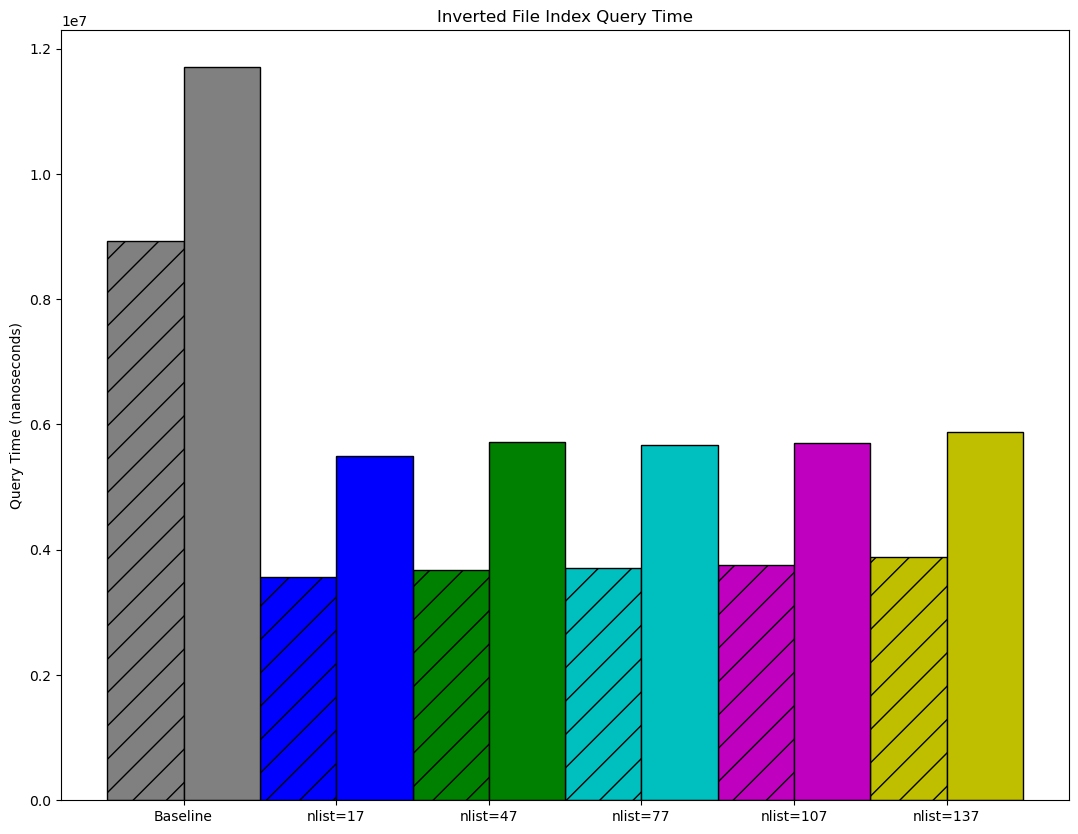

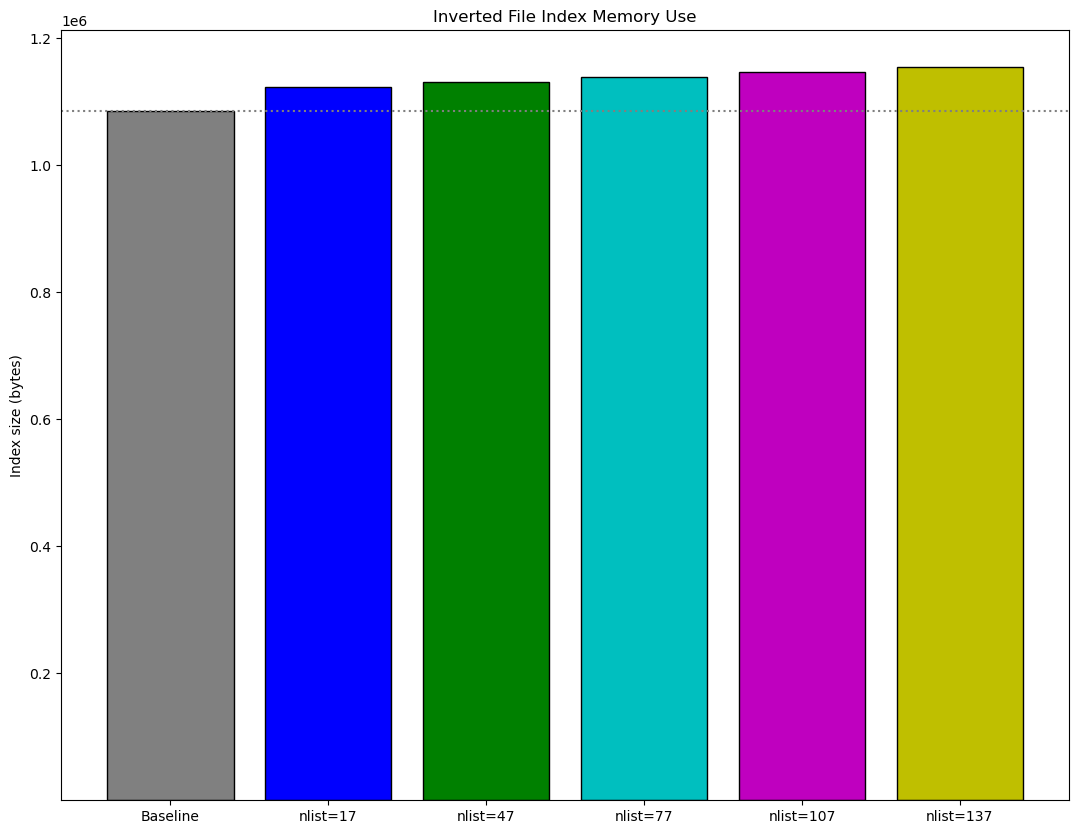

In [7]:
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(13, 10)
br1 = np.arange(len(speed_minor))
br2 = br2 = [x + 0.5 for x in br1] 
colors=["gray", "b", "g", "c", "m", "y"]

ax1.bar(br1, speed_minor, color=colors, width=0.5, hatch='/', edgecolor="black")
ax1.bar(br2, speed_major, color=colors, width=0.5, edgecolor="black")
ax1.set_xticks([r + 0.25 for r in range(len(speed_minor))],['Baseline', 'nlist=17', 'nlist=47', 'nlist=77', 'nlist=107', 'nlist=137'])
ax1.set_ylabel('Query Time (nanoseconds)')
ax1.set_title('Inverted File Index Query Time')
plt.show()
fig.savefig("FigureRerunPresentation\QueryTimeIVFFLAT.png")

fig, (ax1) = plt.subplots(1)
fig.set_size_inches(13, 10)

ax1.axhline(y=1084973, color="gray", linestyle='dotted')
ax1.bar(['Baseline', '17', '47', '77', '107', '137'], mem, color=colors, edgecolor="black")
ax1.set_yticks([200000, 400000, 600000, 800000, 1000000, 1200000])
ax1.set_xticks([r for r in range(len(speed_minor))],['Baseline', 'nlist=17', 'nlist=47', 'nlist=77', 'nlist=107', 'nlist=137'])
ax1.set_ylabel('Index size (bytes)')
ax1.set_title('Inverted File Index Memory Use')
plt.show()
fig.savefig("FigureRerunPresentation\MemoryIVFFLAT.png")